# Assignment 1 - Group 22

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Utilities

In [2]:
# Set a random seed for reproducibility
np.random.seed(25)

In [3]:
# Load the dataset
dataset = np.loadtxt("att48_d.txt")
dataset

array([[   0., 4727., 1205., ..., 1542., 2379., 3744.],
       [4727.,    0., 3588., ..., 5461., 4390., 2088.],
       [1205., 3588.,    0., ..., 2023., 1867., 2560.],
       ...,
       [1542., 5461., 2023., ...,    0., 1644., 3928.],
       [2379., 4390., 1867., ..., 1644.,    0., 2532.],
       [3744., 2088., 2560., ..., 3928., 2532.,    0.]])

In [4]:
# Generate city indices from 0
cityIndex=[i for i in range(len(dataset))]

### Helper Functions

In [5]:
def calcDist(cityindex, startCity=0):
    """ Calculates the distance of roundtrip given cities in an order and returns the negative of it.
    
        Params:
            cityindex = array of cities
            startCity = Starting city(indexed from 0)
        Returns:
            -dist = negative of distance for the round trip. 
    """
    dist=0
    n=len(cityindex)
    for i in range(startCity,startCity+n):
        dist+=dataset[cityindex[i%n]][cityindex[(i+1)%n]]
    return -dist

In [6]:
def genYt(S):
    """ Generates the cost array(negative of distance) of Sample Space S
        
        Params:
            S = SampleSpace
        Returns:
            Yt = Cost array
    """
    Yt = np.array([calcDist(S[i]) for i in range(len(S))])
    return Yt

In [7]:
def genUt(Y):
    """ Generates Non Negative scores of Yt
                
        Params:
            Y = Cost array
        Returns:
            U = Non Negative Cost array
    """
    return Y - min(Y)

In [8]:
def evalPt(U):
    """ Returns the Fitness Scores of U
                
        Params:
            U = Non Negative cost array
        Returns:
            P = Fitness scores
    """
    U_sum = sum(U)
    U = U / U_sum
    return U

In [9]:
def genChild(parent):
    """ Generates a child by copying and swapping two indices from the parent.
                
        Params:
            parent = a sample space
        Returns:
            child = parent with two indices randomly swapped
    """
    i = range(len(parent))
    i1, i2 = random.sample(i, 2)
    child = np.copy(parent)
    child[i1], child[i2] = child[i2], child[i1]
    return child

In [10]:
def select_best(S1, S2, Y1, Y2, m):
    """ Selelct best S and Y with least cost from S1 and S2 with cost Y1 and Y2
            
        Params:
            S1 = SampleSpace 1
            S2 = SampleSpace 2
            Y1 = Cost array 1
            Y2 = Cost array 2
            m = population size
        Returns:
            S_best = best samplespace among them
            Y_best = cost array of best sample space
    """
    best = []
    for i in range(len(Y1)):
        best.append([Y1[i], i, 1]) # Cost, Index, position 1(Y1)
    for i in range(len(Y2)):
        best.append([Y2[i], i, 2]) # Cost, Index, position 2(Y2)
    best.sort(reverse=True)    # Sort from best to last wrt to cost
    S_best = []   # Empty lists to store the best children and costs
    Y_best = []
    for i in range(m): # check all children for which is best
        cost, index, pos = best[i]
        Y_best.append(cost)
        
        # Check the best of two
        if pos ==1:
            S_best.append(list(S1[index])) # If the top value is from S1 then add S1 to the best list
        if pos ==2:
            S_best.append(list(S2[index])) # If the top value is from S2 then add S2 to the best list
    return np.array(S_best), np.array(Y_best)

In [11]:
# Algoirthm
def Search(cityIndex, pop_size, iterations=1000):
    """ Stochastic Search. 
    
        Params:
            cityIndex = cities indexes in order
            pop_size = size of population
            iterations = no of iterations of the algorithm
        Returns:
            opt_path = optimal path found
            opt_Y = cost of the optimal path found
    """
    # Initialization
    m = pop_size # Population Size
    SampleSpace = [] # Initial Sample Space by random shuffling
    Y_initial = [] # Cost for the initial sample space
    for i in range(m):
        np.random.shuffle(cityIndex)
        Y_initial.append(calcDist(cityIndex)) 
        SampleSpace.append(list(cityIndex))
    SampleSpace = np.array(SampleSpace)
    Y_initial = np.array(Y_initial)
    S = SampleSpace    # define initial sample space and cost 
    Y = Y_initial
    opt_Y = Y[0] #we will check for optimum solution at each and every step
    opt_path = S[0]
    # Loop for number of Iterations
    for t in range(iterations):
        U = genUt(Y)
        P = evalPt(U) 
        P = np.around(P*m) 
        P = np.int64(P) 
        S_new=[]
        for j in range(len(S)):
            for k in range(P[j]):
                S_new.append(list(genChild(S[j])))          
        S_new=np.array(S_new) 
        Y_new=genYt(S_new)
        S,Y=select_best(S,S_new,Y,Y_new,m) 
        for i in range(m):
            if Y[i] > opt_Y:
                opt_Y = Y[i]
                opt_path = S[i]
    opt_Y = -opt_Y  # Make cost positive 
    return opt_path, opt_Y

### Find the Optimal Population Size

In [12]:
opt_pop_size = np.arange(1, 201) # Population size from 1 to 100 to chose the best
opt_pop_size

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
# To find the optimal population size between 1 and 100
opt_cost = []
opt_paths = []
for m in opt_pop_size:
    SampleSpace = [] # Initial Sample Space by random shuffling
    Y_initial = [] # Cost for the initial sample space
    opt_path, opt_Y = Search(cityIndex,m)
    opt_cost.append(opt_Y)

/home/wally1002/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


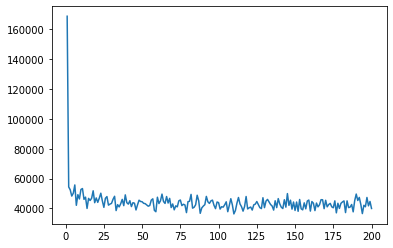

In [14]:
plt.plot(opt_pop_size, opt_cost)
plt.show()

In [15]:
best_population_size = np.argmin(opt_cost) # Select the best population size
print("Best Population size = {}".format(best_population_size))

Best Population size = 109


In [16]:
opt_path, opt_cost = Search(cityIndex, pop_size=best_population_size)

In [17]:
# Priting out the path calculated
print("The optimal path for No of children  = {}, No of iterations = {} is:".format(best_population_size, 1000), end='\n\n')
for i in range(len(opt_path)):
    print(opt_path[i],end=" --> ")
print(opt_path[0],end="\n\n")
print("Cost of the optimal path calculated = {}".format(opt_Y))

The optimal path for No of children  = 109, No of iterations = 1000 is:

38 --> 47 --> 4 --> 24 --> 13 --> 22 --> 10 --> 11 --> 32 --> 45 --> 35 --> 29 --> 42 --> 16 --> 26 --> 18 --> 36 --> 5 --> 27 --> 6 --> 17 --> 43 --> 30 --> 37 --> 2 --> 33 --> 12 --> 31 --> 23 --> 9 --> 25 --> 3 --> 34 --> 44 --> 41 --> 1 --> 28 --> 40 --> 15 --> 21 --> 0 --> 7 --> 8 --> 39 --> 14 --> 19 --> 46 --> 20 --> 38

Cost of the optimal path calculated = 39887.0


### Results
Optimal Path for the dataset:

1 --> 8 --> 38 --> 31 --> 44 --> 18 --> 7 --> 28 --> 6 --> 37 --> 19 --> 27 --> 17 --> 43 --> 30 --> 36 --> 46 --> 33 --> 20 --> 47 --> 21 --> 32 --> 39 --> 48 --> 5 --> 42 --> 24 --> 10 --> 45 --> 35 --> 4 --> 26 --> 2 --> 29 --> 34 --> 41 --> 16 --> 22 --> 3 --> 23 --> 14 --> 25 --> 13 --> 11 --> 12 --> 15 --> 40 --> 9 --> 1

Cost of optimal path
**33551**